# LayerPlexRank: EUAir Experiments

**Dataset:**

The multilayer network is composed by thirty-seven different layers each one corresponding to a different airline operating in Europe.

> Cardillo, Alessio, et al. "Emergence of network features from multiplexity." *Scientific reports* 3.1 (2013): 1-6.

*Dataset collected from https://manliodedomenico.com/data.php, and refer to offical web page for above publication http://complex.unizar.es/~atnmultiplex/.*

In [1]:
path_dataset = "datasets/EUAir/EUAir_Transportation_multiplex.csv"
path_layers = "datasets/EUAir/EUAir_Transportation_layers.txt"
path_nodes = "datasets/EUAir/EUAir_Transportation_nodes.txt"
path_sub_datasets_for_loocv = "datasets/EUAir/LOOCV_subdatasets_EUAir/*"

## 1. Correctness of LayerPlexRank

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from LayerPlexRank import *
from ExperimentHelpers import *


# Load the dataset as adjacency matrices.
euair_network, euair_shape = load_network(path_dataset)
# Calculate results by LayerPlexRank.
X, Z = layer_plex_rank(euair_network, euair_shape, 1, 1, 1)

In [5]:
# betweenness
bX, bZ = benchmark_centrality(euair_network, euair_shape, 'betweenness')
# closeness
cX, cZ = benchmark_centrality(euair_network, euair_shape, 'closeness')
# degree
dX, dZ = benchmark_centrality(euair_network, euair_shape, 'degree')
# eigenvector
eX, eZ = benchmark_centrality(euair_network, euair_shape, 'eigenvector')
# pagerank
pX, pZ = benchmark_centrality(euair_network, euair_shape, 'pagerank')

In [6]:
nodes_centralities = {
    'X': X,
    'bX': bX,
    'cX': cX,
    'dX': dX,
    'eX': eX,
    'pX': pX
}

nodes_rho, nodes_p = calculate_spearman_for_lists(nodes_centralities, show=True)

Spearman correlation between X and X: 1.00000 (p-value: 0.000)
Spearman correlation between X and bX: 0.77716 (p-value: 0.000)
Spearman correlation between X and cX: 0.89769 (p-value: 0.000)
Spearman correlation between X and dX: 0.89920 (p-value: 0.000)
Spearman correlation between X and eX: 0.78015 (p-value: 0.000)
Spearman correlation between X and pX: 0.80551 (p-value: 0.000)
Spearman correlation between bX and bX: 1.00000 (p-value: 0.000)
Spearman correlation between bX and cX: 0.66432 (p-value: 0.000)
Spearman correlation between bX and dX: 0.87218 (p-value: 0.000)
Spearman correlation between bX and eX: 0.71548 (p-value: 0.000)
Spearman correlation between bX and pX: 0.81527 (p-value: 0.000)
Spearman correlation between cX and cX: 1.00000 (p-value: 0.000)
Spearman correlation between cX and dX: 0.87680 (p-value: 0.000)
Spearman correlation between cX and eX: 0.86784 (p-value: 0.000)
Spearman correlation between cX and pX: 0.84071 (p-value: 0.000)
Spearman correlation between dX 

In [7]:
layers_influences = {
    'Z': Z,
    'bZ': bZ,
    'cZ': cZ,
    'dZ': dZ,
    'eZ': eZ,
    'pZ': pZ
}

layers_rho, layers_p = calculate_spearman_for_lists(layers_influences, show=True)

Spearman correlation between Z and Z: 1.00000 (p-value: 0.000)
Spearman correlation between Z and bZ: 0.42295 (p-value: 0.009)
Spearman correlation between Z and cZ: 0.48435 (p-value: 0.002)
Spearman correlation between Z and dZ: 0.43412 (p-value: 0.007)
Spearman correlation between Z and eZ: 0.54339 (p-value: 0.001)
Spearman correlation between Z and pZ: 0.21058 (p-value: 0.211)
Spearman correlation between bZ and bZ: 1.00000 (p-value: 0.000)
Spearman correlation between bZ and cZ: 0.79208 (p-value: 0.000)
Spearman correlation between bZ and dZ: 0.83077 (p-value: 0.000)
Spearman correlation between bZ and eZ: 0.83191 (p-value: 0.000)
Spearman correlation between bZ and pZ: 0.02371 (p-value: 0.889)
Spearman correlation between cZ and cZ: 1.00000 (p-value: 0.000)
Spearman correlation between cZ and dZ: 0.65556 (p-value: 0.000)
Spearman correlation between cZ and eZ: 0.95330 (p-value: 0.000)
Spearman correlation between cZ and pZ: 0.18544 (p-value: 0.272)
Spearman correlation between dZ 

### Appendix A for \#1: Data Visualisation

In [8]:
airports = pd.read_csv(path_nodes, sep=" ")
airports['weight'] = X
airports.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(15)

,nodeID,nodeLabel,nodeLong,nodeLat,weight
0,15,EHAM,4.764167,52.308057,0.376258
1,50,LEMD,-3.560833,40.472221,0.111528
2,40,LEBL,2.078333,41.296944,0.025094
3,252,EGKK,-0.190278,51.148055,0.019073
4,7,LFPG,2.547778,49.009721,0.015504
5,12,EGSS,0.235000,51.885002,0.014453
6,64,LOWW,16.569721,48.110278,0.012966
7,83,LIRF,12.238889,41.800277,0.012884
8,14,LGAV,23.944446,37.936666,0.012746
9,108,EIDW,-6.270000,53.421387,0.011961


In [9]:
airlines = pd.read_csv(path_layers, sep=" ")
airlines['weight'] = Z
airlines.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(10)

,nodeID,nodeLabel,weight
0,9,KLM,0.213165
1,3,Easyjet,0.109929
2,27,Transavia_Holland,0.101168
3,2,Ryanair,0.078716
4,26,Netjets,0.045812
5,1,Lufthansa,0.042506
6,12,Iberia,0.038264
7,22,Air_Nostrum,0.038112
8,21,Vueling_Airlines,0.035688
9,10,Alitalia,0.025244


In [10]:
import folium
from folium.plugins import HeatMap


m = folium.Map(location=[50, 8], tiles='OpenStreetMap', zoom_start=4.8)
heat_data = [[row['nodeLat'], row['nodeLong'], float(row['weight'])] for index, row in airports.iterrows()]
HeatMap(heat_data).add_to(m)

display(m)

### Appendix B for \#1: Partial Ground Truth

According to [Air Transport Monthly Monitor report of September 2013](https://www.icao.int/sustainability/Documents/MonthlyMonitor_2013/MonthlyMonitor_Sep13.pdf) from *International Civil Aviation Organization (ICAO)*, we have a partial rank of world top 15 airports/airlines as following.

**In Europe, top (4 out of 15) airports are:**
  1. Frankfurt, DE (EDDF)
  2. London, GB (EGLL)
  3. Paris, FR (LFPG)
  4. Amsterdam, NL (EHAM)

**Moreover, top (4 out of 15) airlines are:**
  1. AF-KLM
  2. Lufthansa
  3. British Airways
  4. Ryanair

### Appendix C for \#1: Heat Map of `calculate_spearman_for_list()`

In [11]:
%config InlineBackend.figure_format = 'retina'

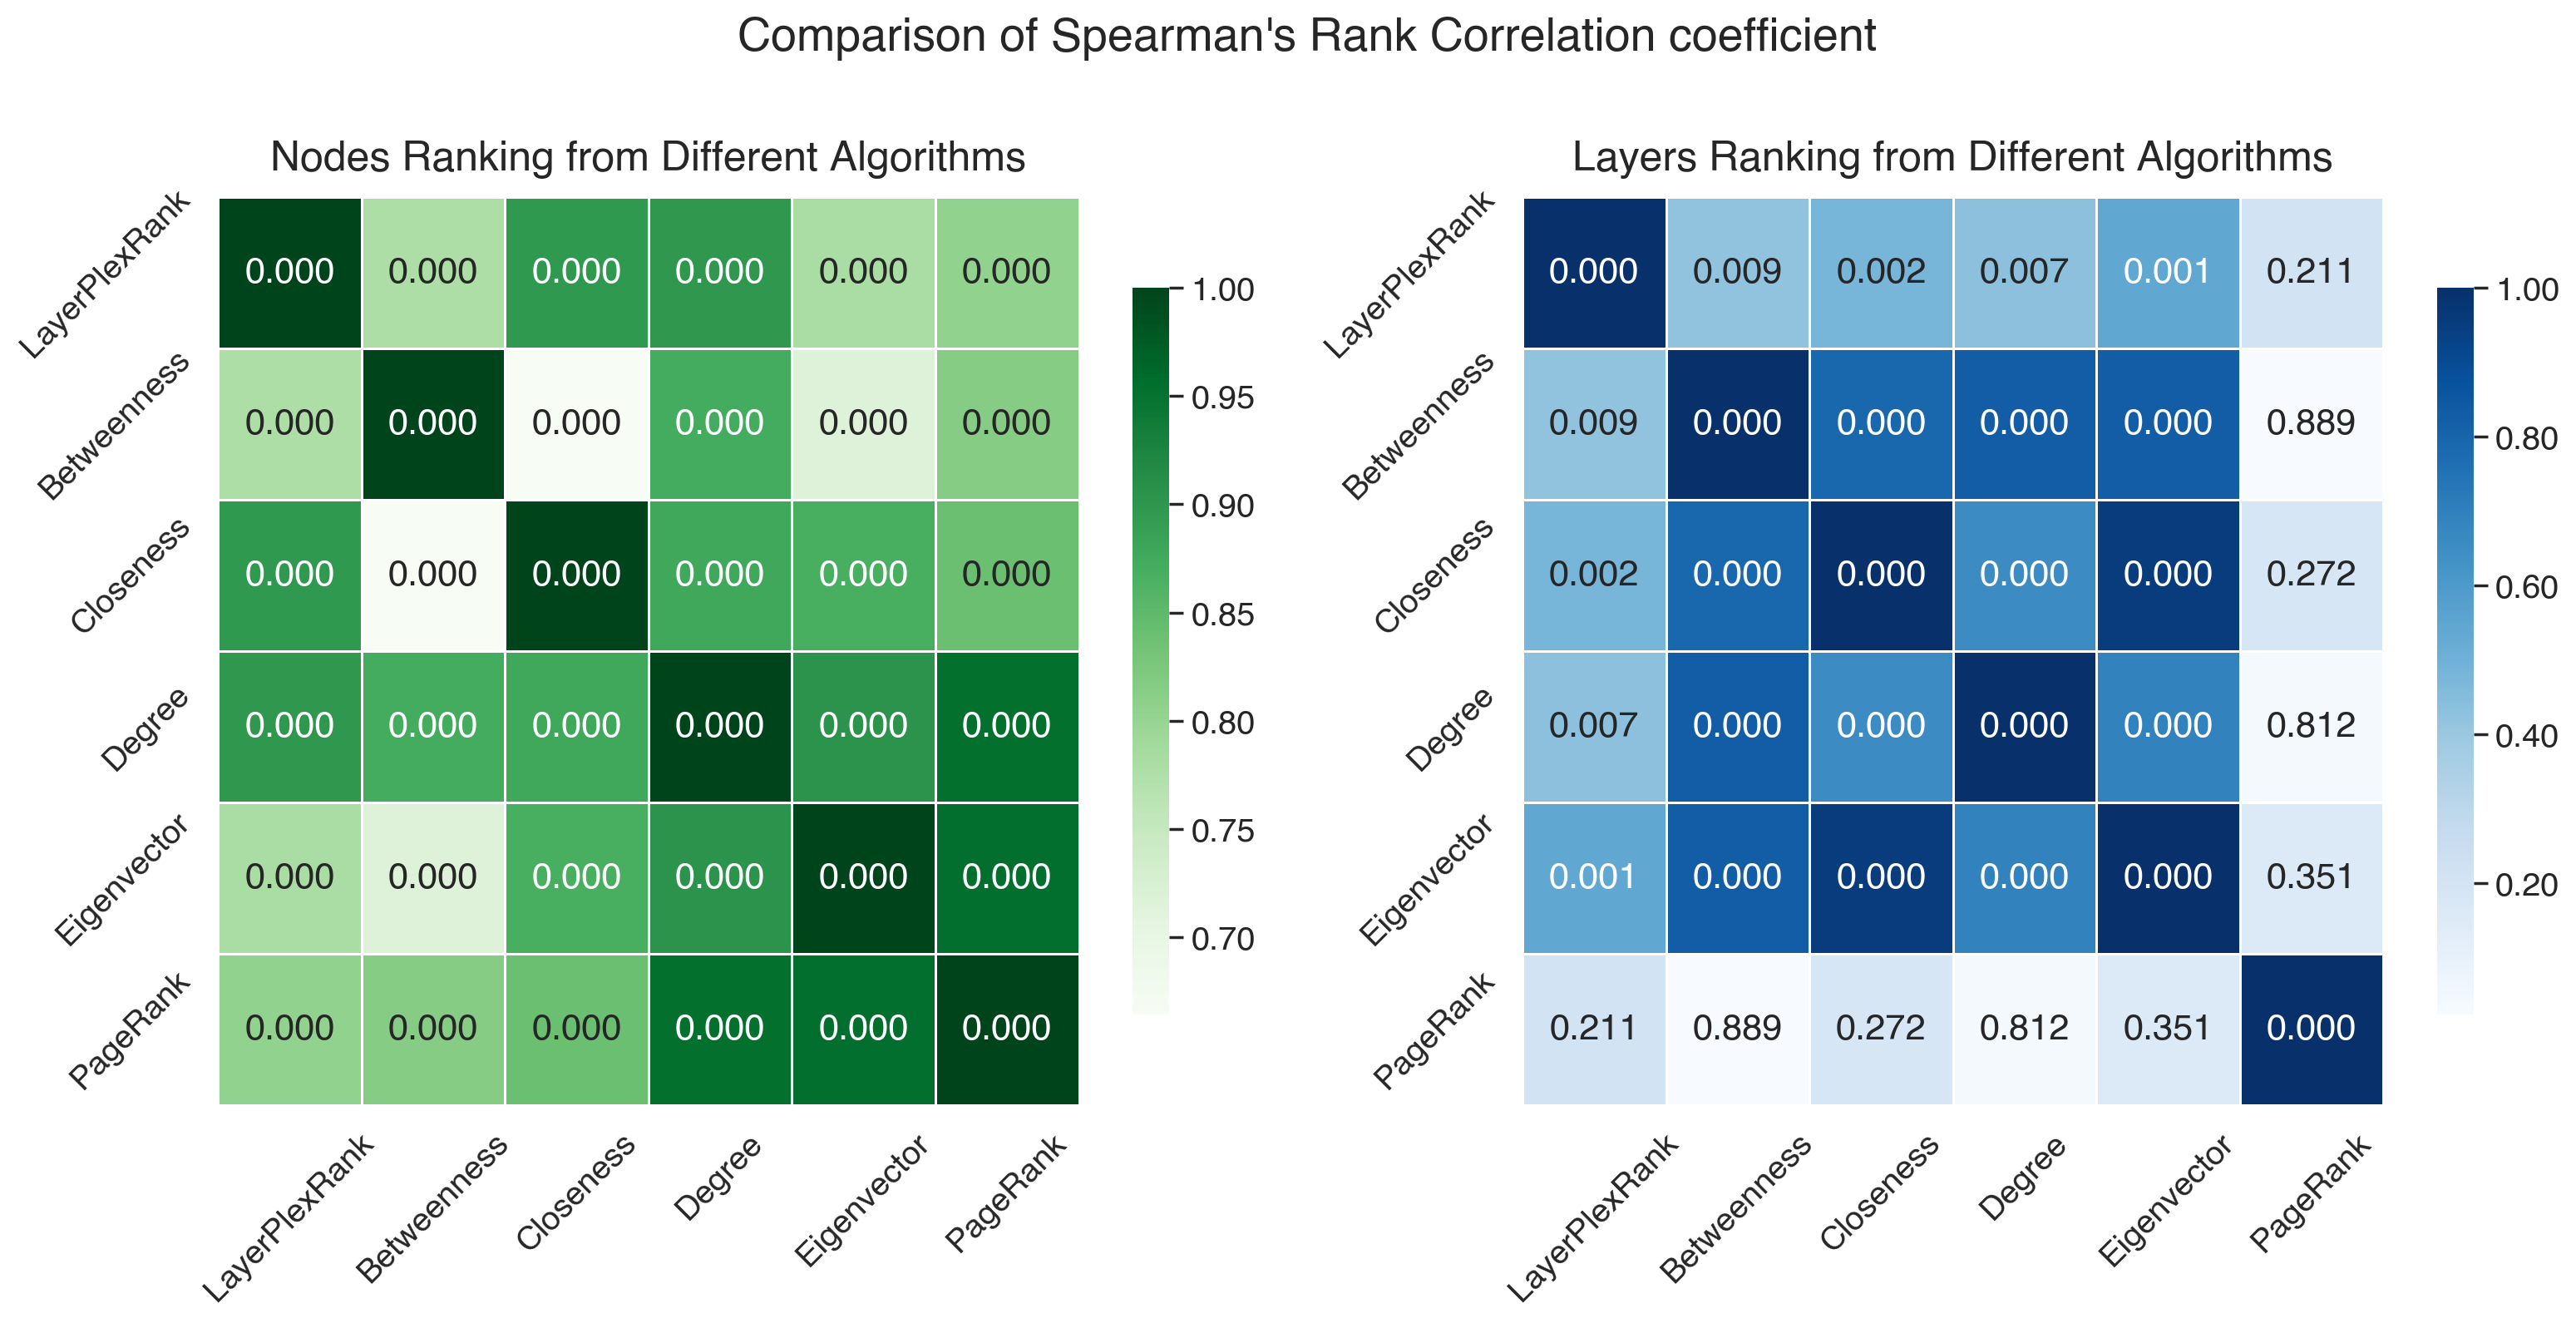

In [12]:
algo_names = ['LayerPlexRank', 'Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'PageRank']
nodes_fig_title = "Nodes Ranking from Different Algorithms"
layers_fig_title = "Layers Ranking from Different Algorithms"
suptitle = "Comparison of Spearman\'s Rank Correlation coefficient"

heatmap_save_path = "img/euair_exp1_heatmap.eps"

# Color denotes the Spearman correlation coefficient, with corresponding p-values annotated on the figure.
plot_and_save_correlation_heatmaps(nodes_rho, nodes_p, layers_rho, layers_p, algo_names,
                                   nodes_fig_title, layers_fig_title, suptitle, heatmap_save_path)

## 2. Robustness and Efficiency of LayerPlexRank

In [13]:
from glob import glob
import re


files_list = glob(path_sub_datasets_for_loocv)
files_list.sort(key=lambda f: int(re.sub('\D', '', f)))

The following code blocks require

| Description | LPR         | Betweenness | Closeness   | Degree      | Eigenvector | PageRank    |
|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| **Run 1**   | 08m 23s     | 12m 02s     | 03m 04s     | 02m 19s     | 02m 08s     | 03m 07s     |

wtih `sort=True` on *Apple MacBook Pro 2021 (M1 Pro Chip and 16 GB Memory)* locally.

In [14]:
lpr_pct_diff_nodes = loocv(files_list, euair_network, euair_shape, "LayerPlexRank", sort=True)

100%|█████████████████████████████████████████| 450/450 [08:23<00:00,  1.12s/it]


In [15]:
b_pct_diff_nodes = loocv(files_list, euair_network, euair_shape, "betweenness", sort=True)

100%|█████████████████████████████████████████| 450/450 [12:02<00:00,  1.61s/it]


In [16]:
c_pct_diff_nodes = loocv(files_list, euair_network, euair_shape, "closeness", sort=True)

100%|█████████████████████████████████████████| 450/450 [03:04<00:00,  2.44it/s]


In [17]:
d_pct_diff_nodes = loocv(files_list, euair_network, euair_shape, "degree", sort=True)

100%|█████████████████████████████████████████| 450/450 [02:19<00:00,  3.22it/s]


In [18]:
e_pct_diff_nodes = loocv(files_list, euair_network, euair_shape, "eigenvector", sort=True)

100%|█████████████████████████████████████████| 450/450 [02:48<00:00,  2.67it/s]


In [19]:
p_pct_diff_nodes = loocv(files_list, euair_network, euair_shape, "pagerank", sort=True)

100%|█████████████████████████████████████████| 450/450 [03:07<00:00,  2.39it/s]


In [20]:
print(f"{'LayerPlexRank:':<16} Total: {np.sum(lpr_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(lpr_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Betweenness:':<16} Total: {np.sum(b_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(b_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Closeness:':<16} Total: {np.sum(c_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(c_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Degree:':<16} Total: {np.sum(d_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(d_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Eigenvector:':<16} Total: {np.sum(e_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(e_pct_diff_nodes) * 100:7.3f}%")
print(f"{'PageRank:':<16} Total: {np.sum(p_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(p_pct_diff_nodes) * 100:7.3f}%")

LayerPlexRank:   Total:   105.072%,   Average:   0.233%
Betweenness:     Total:   185.932%,   Average:   0.413%
Closeness:       Total:    88.474%,   Average:   0.197%
Degree:          Total:   412.300%,   Average:   0.916%
Eigenvector:     Total:   135.604%,   Average:   0.301%
PageRank:        Total:    97.320%,   Average:   0.216%


### Appendix D for #2: Difference Percentages Figure Drawing

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


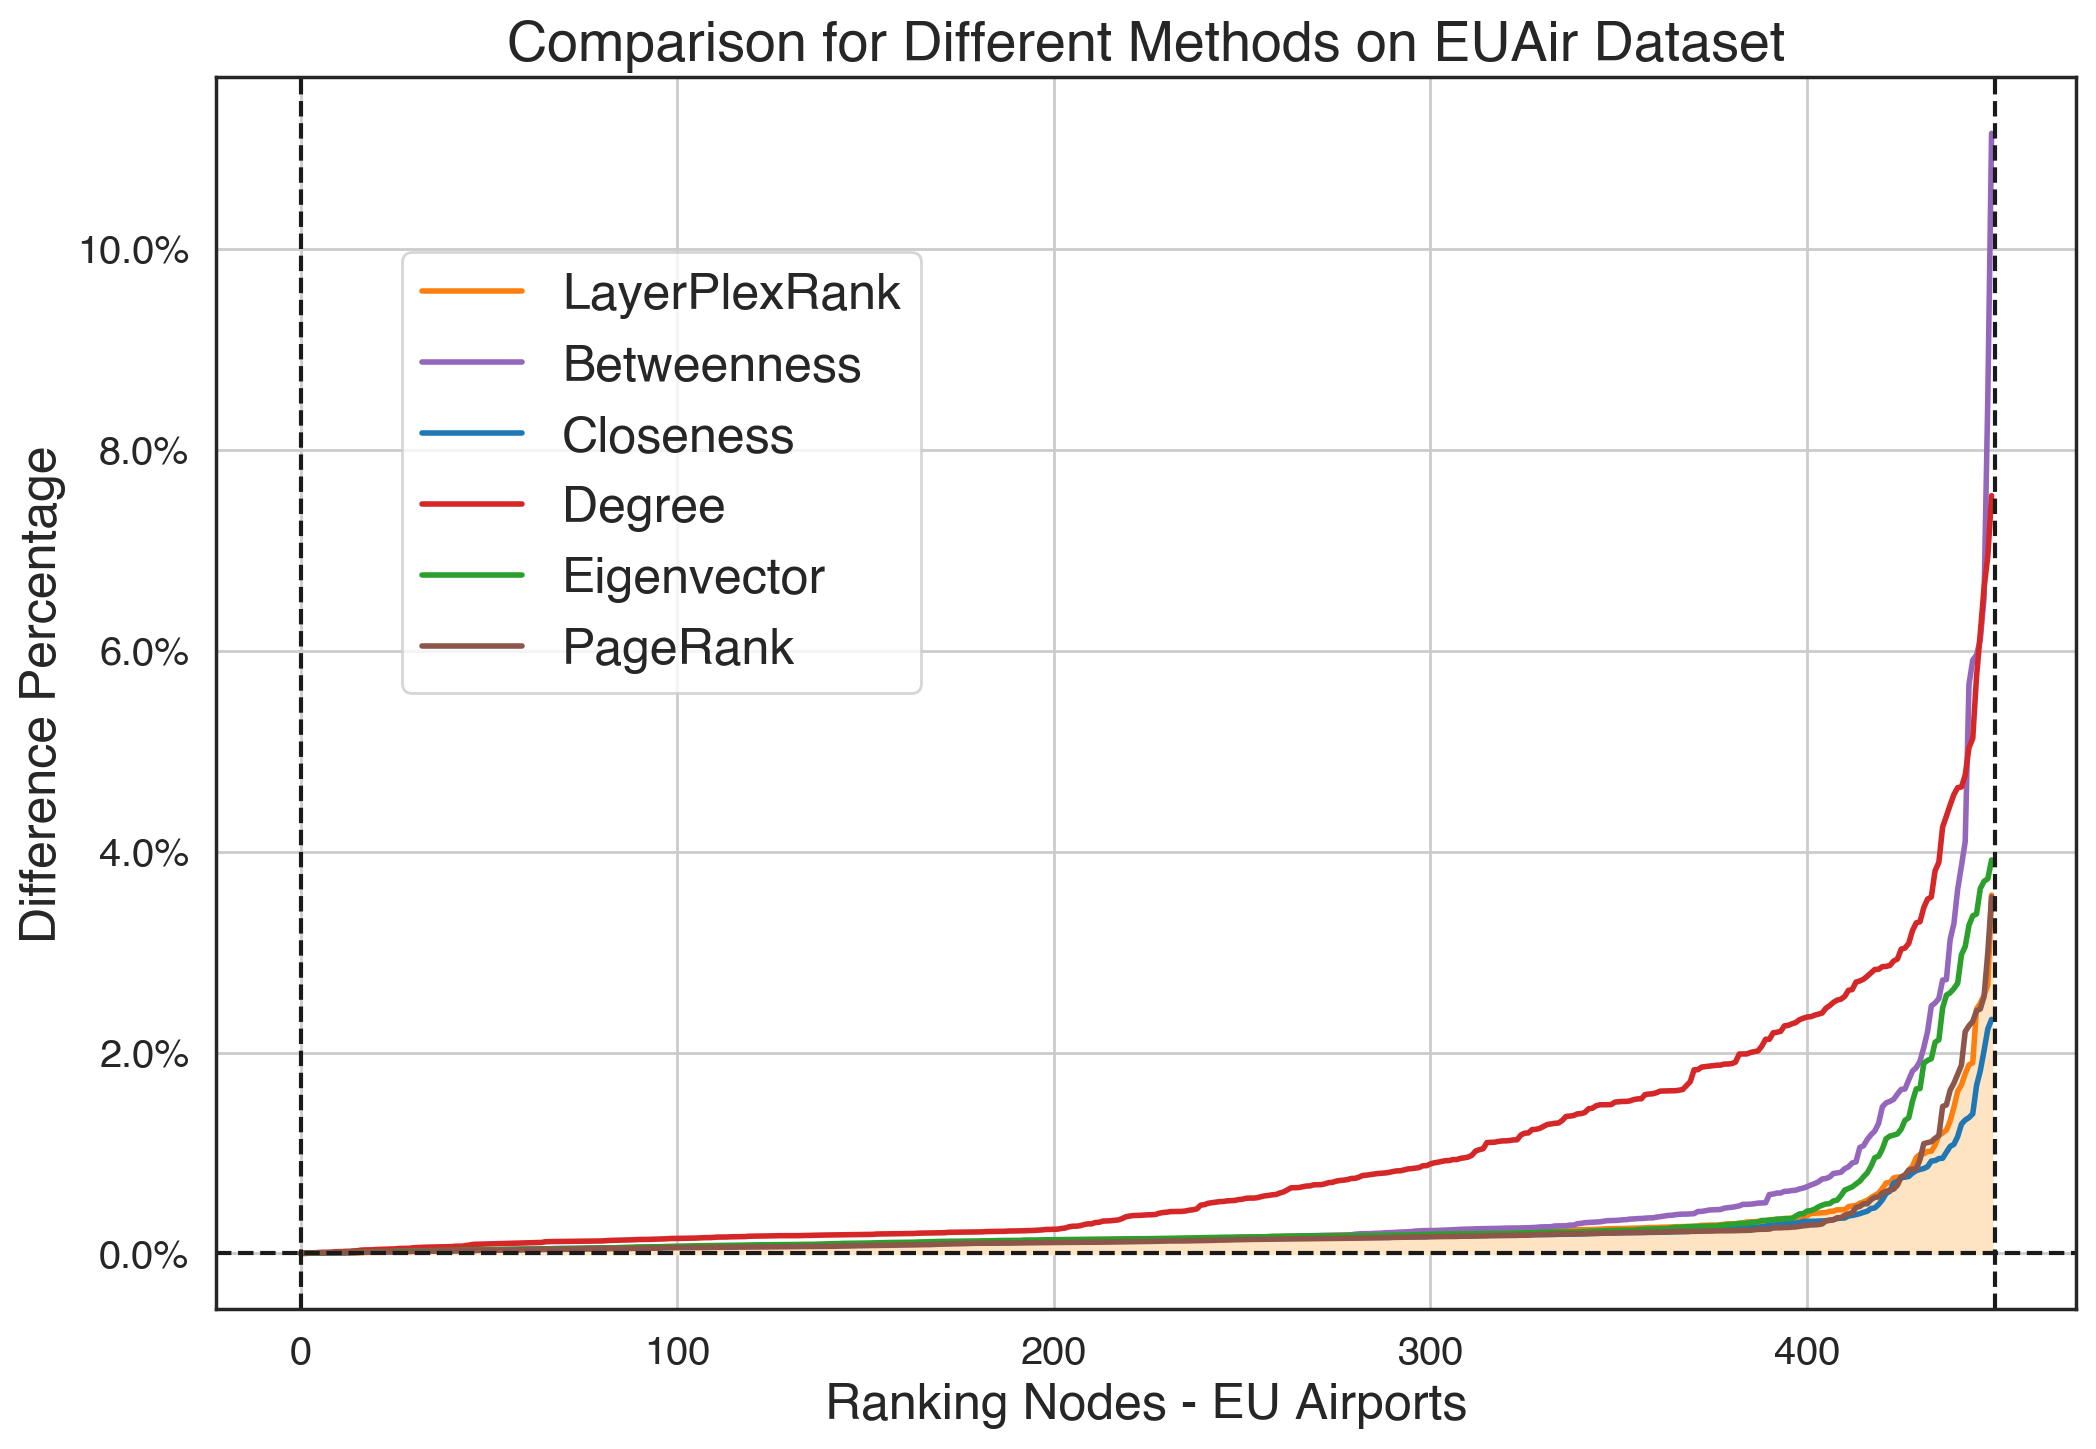

In [34]:
colours_group = ['tab:orange', 'tab:purple', 'tab:blue', 'tab:red', 'tab:green', 'tab:brown']
diff_fig_xlabel = "Ranking Nodes - EU Airports"
diff_fig_ylabel = "Difference Percentage"
diff_fig_title = "Comparison for Different Methods on EUAir Dataset"

diff_fig_save_path = "img/euair_exp2_diff_fig.eps"

# Creating a DataFrame for Seaborn
diff_fig_data = pd.DataFrame({
    'x-axis': np.arange(0, len(lpr_pct_diff_nodes)),
    'LayerPlexRank': lpr_pct_diff_nodes,
    'Betweenness': b_pct_diff_nodes,
    'Closeness': c_pct_diff_nodes,
    'Degree': d_pct_diff_nodes,
    'Eigenvector': e_pct_diff_nodes,
    'PageRank': p_pct_diff_nodes
})

plot_and_save_diff_percentage_lineplot(diff_fig_data, colours_group, diff_fig_xlabel, diff_fig_ylabel, diff_fig_title, diff_fig_save_path)

## 3. Parameter Sensitivity Analysis

In [76]:
node_ids = np.arange(0, 451, 5)  # List of node IDs
sens = parameter_sensitivity(euair_network, euair_shape, node_ids)
sens_data = pd.DataFrame(sens)

100%|███████████████████████████████████████████| 31/31 [00:08<00:00,  3.55it/s]


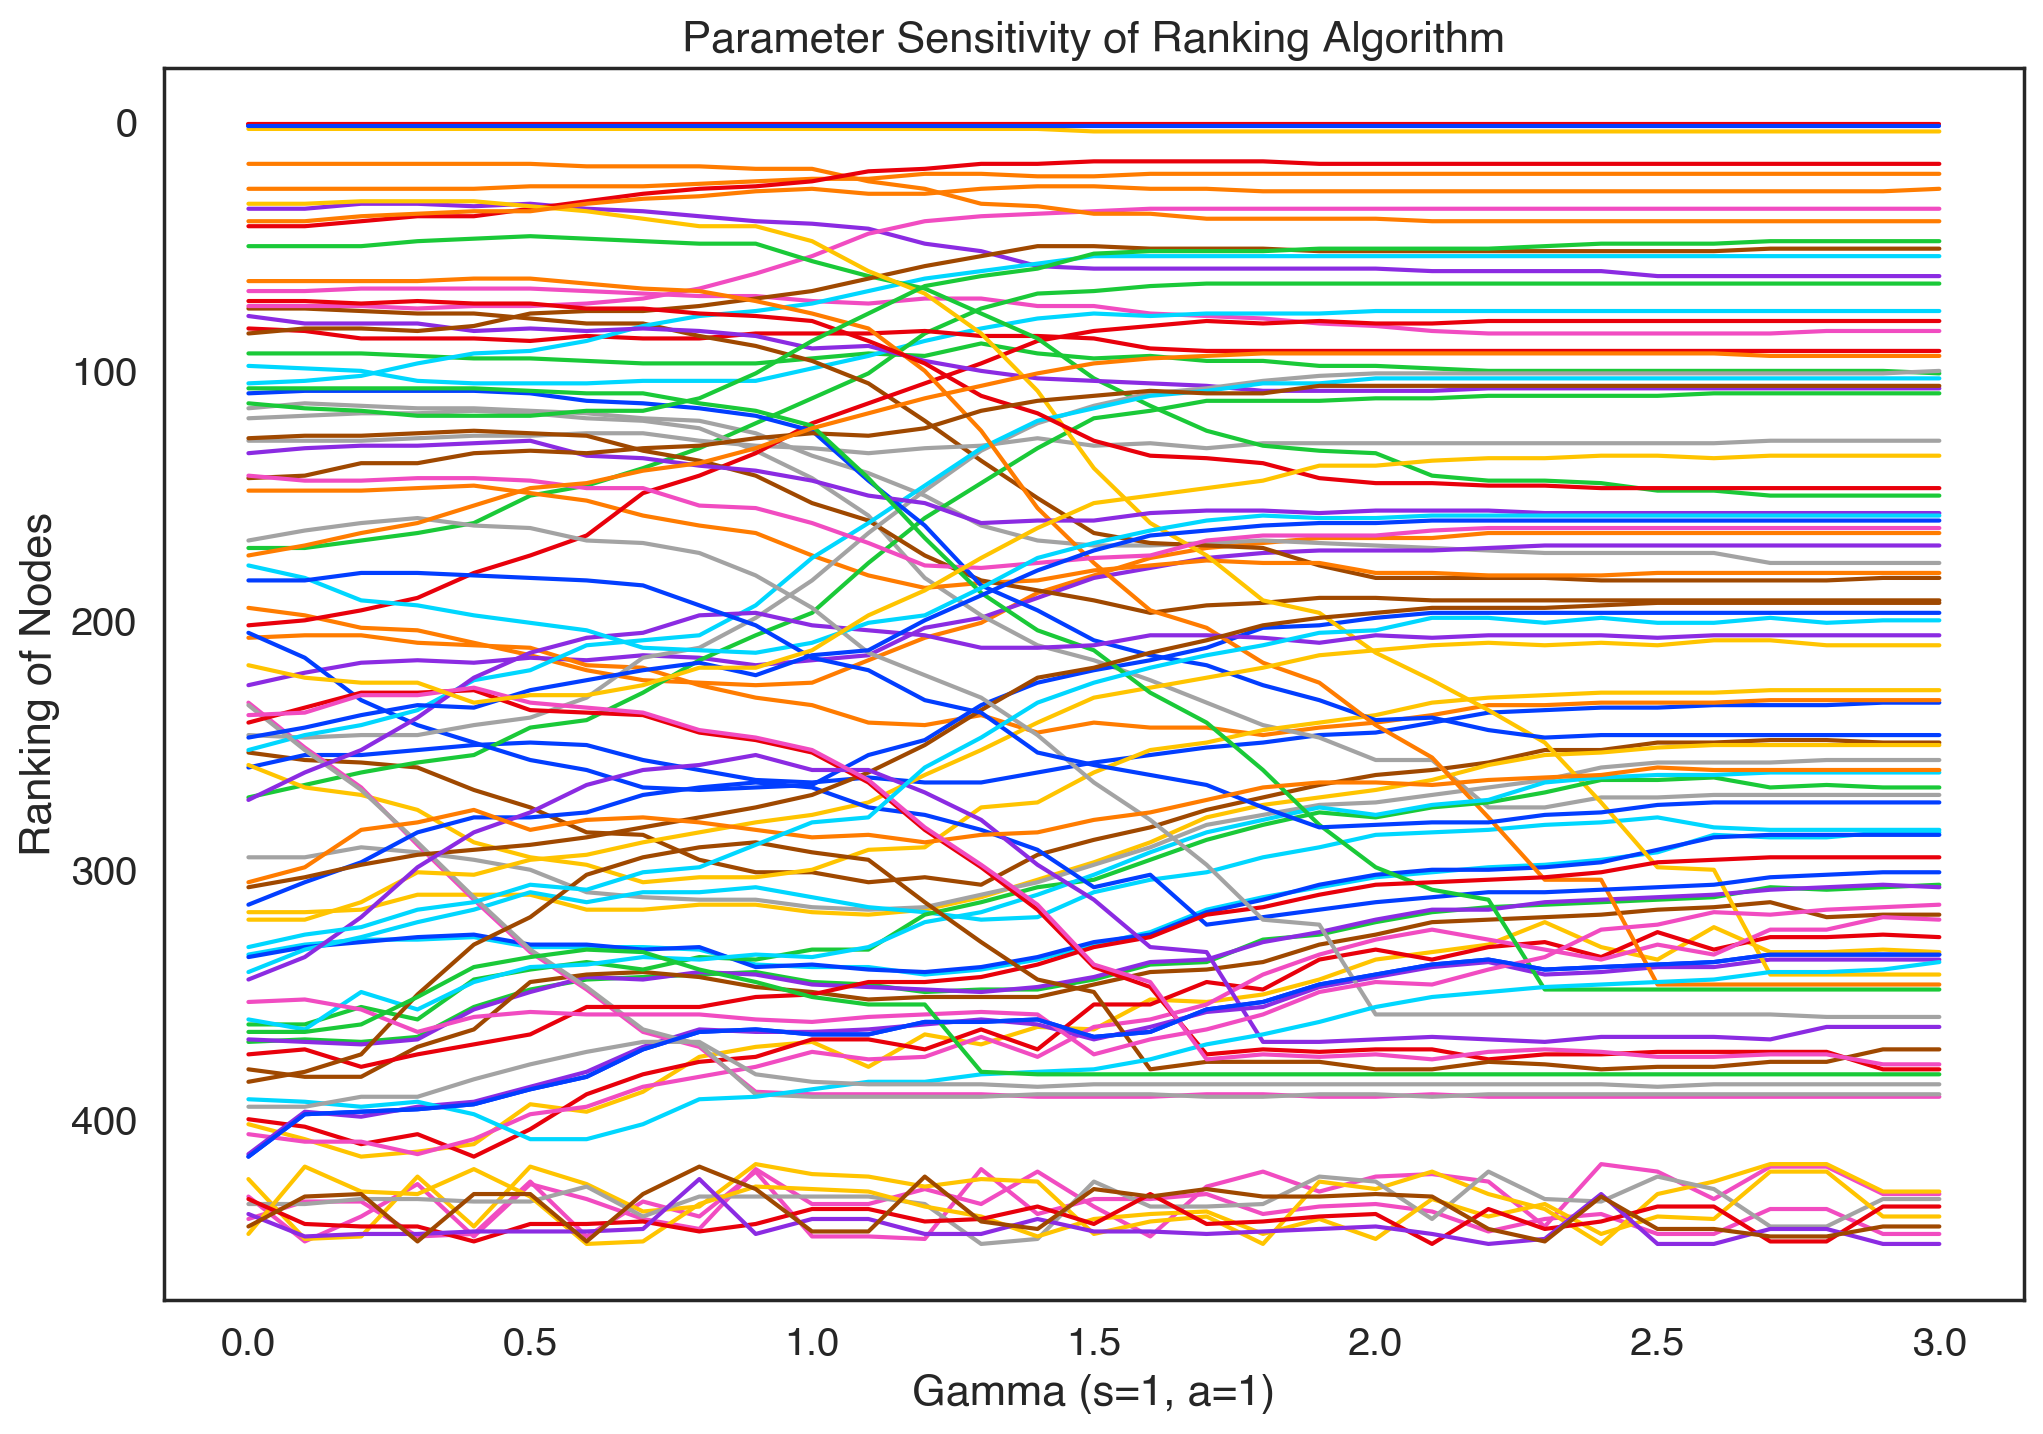

In [89]:
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
sns.lineplot(data=sens_data, x='gamma', y='rank', hue='node_id', palette='bright', legend=False)
plt.title('Parameter Sensitivity of Ranking Algorithm')
plt.xlabel('Gamma (s=1, a=1)')
plt.ylabel('Ranking of Nodes')
plt.show()